In [2]:
# Importing essential libraries
import tweepy
import pandas as pd
from datetime import datetime
import yfinance as yf 
import matplotlib.pyplot as plt

In [3]:
# Authorization & Connection to Twitter API using Tweepy
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAHYabQEAAAAAvw0hWydZNRSnU9G%2BHFL2VYwH9wk%3De1QXuj2GAlRofwZp6ee0lSpBGsW6zEel3wCL6VWM3Go8DS3KSv'
client = tweepy.Client(bearer_token = BEARER_TOKEN)

In [4]:
# Function that returns Tweet Counts and Buzz Score for a list of arguments
def tweetCount(queries, lang = 'en'):
    for query in queries:
        query = query + ' "lang:' + lang + '"' + ' "near:India"'
    tweets = client.get_recent_tweets_count(query = queries[0], 
                                            granularity = 'minute', 
                                            start_time = '2022-04-08T03:45:00Z', 
                                            end_time = '2022-04-09T10:00:00Z')
    total = pd.DataFrame(tweets.data)
    total.columns = ['End', 'Start', 'Tweet Count']
    total.set_index('Start')
    for i in range(1, len(queries)):
        tweets = client.get_recent_tweets_count(query = queries[i], 
                                                granularity = 'minute', 
                                                start_time = '2022-04-08T03:45:00Z', 
                                                end_time = '2022-04-09T10:00:00Z')
        df = pd.DataFrame(tweets.data)
        df.columns = ['End', 'Start', 'Tweet Count']
        total['Tweet Count'] = total['Tweet Count'] + df['Tweet Count']
    total['Start'] = pd.to_datetime(total['Start']).dt.tz_convert('Asia/Kolkata')
    total['End'] = pd.to_datetime(total['End']).dt.tz_convert('Asia/Kolkata')
    total.set_index('Start', inplace = True)
    return total

In [5]:
# Individual Counts and Buzz Score for HDFC related tweets
hdfc = tweetCount(['HDFC', 'HDFC Life', 'HDFC Bank'])
hdfc

,End,Tweet Count
Start,,
2022-04-08 09:15:00+05:30,2022-04-08 09:16:00+05:30,11
2022-04-08 09:16:00+05:30,2022-04-08 09:17:00+05:30,11
2022-04-08 09:17:00+05:30,2022-04-08 09:18:00+05:30,6
2022-04-08 09:18:00+05:30,2022-04-08 09:19:00+05:30,8
2022-04-08 09:19:00+05:30,2022-04-08 09:20:00+05:30,6
...,...,...
2022-04-09 15:25:00+05:30,2022-04-09 15:26:00+05:30,4
2022-04-09 15:26:00+05:30,2022-04-09 15:27:00+05:30,2
2022-04-09 15:27:00+05:30,2022-04-09 15:28:00+05:30,6


In [6]:
# Everything relevant to Reliance stock
reliance = tweetCount(['Reliance', 'Ambani', 'Jio'])
reliance

,End,Tweet Count
Start,,
2022-04-08 09:15:00+05:30,2022-04-08 09:16:00+05:30,6
2022-04-08 09:16:00+05:30,2022-04-08 09:17:00+05:30,6
2022-04-08 09:17:00+05:30,2022-04-08 09:18:00+05:30,7
2022-04-08 09:18:00+05:30,2022-04-08 09:19:00+05:30,7
2022-04-08 09:19:00+05:30,2022-04-08 09:20:00+05:30,9
...,...,...
2022-04-09 15:25:00+05:30,2022-04-09 15:26:00+05:30,6
2022-04-09 15:26:00+05:30,2022-04-09 15:27:00+05:30,4
2022-04-09 15:27:00+05:30,2022-04-09 15:28:00+05:30,10


In [7]:
# Steel being a generic word, maybe we can use a geographical param in retrieving India specific data
sail = tweetCount(['SAIL', 'steel', 'PSU'])
sail

,End,Tweet Count
Start,,
2022-04-08 09:15:00+05:30,2022-04-08 09:16:00+05:30,17
2022-04-08 09:16:00+05:30,2022-04-08 09:17:00+05:30,18
2022-04-08 09:17:00+05:30,2022-04-08 09:18:00+05:30,24
2022-04-08 09:18:00+05:30,2022-04-08 09:19:00+05:30,28
2022-04-08 09:19:00+05:30,2022-04-08 09:20:00+05:30,36
...,...,...
2022-04-09 15:25:00+05:30,2022-04-09 15:26:00+05:30,17
2022-04-09 15:26:00+05:30,2022-04-09 15:27:00+05:30,17
2022-04-09 15:27:00+05:30,2022-04-09 15:28:00+05:30,23


In [8]:
# Overall Buzz in the market compared for several stocks
score = pd.concat([reliance['Tweet Count'], hdfc['Tweet Count'], sail['Tweet Count']], axis = 1)
score.columns = ['Reliance TC', 'HDFC TC', 'SAIL TC']
score['Reliance Buzz'] = (score['Reliance TC'] - score.min().min()) / (score.max().max() - score.min().min())
score['HDFC Buzz'] = (score['HDFC TC'] - score.min().min()) / (score.max().max() - score.min().min())
score['SAIL Buzz'] = (score['SAIL TC'] - score.min().min()) / (score.max().max() - score.min().min())
score[['Reliance Buzz', 'HDFC Buzz', 'SAIL Buzz']]

,Reliance Buzz,HDFC Buzz,SAIL Buzz
Start,,,
2022-04-08 09:15:00+05:30,0.072289,0.132530,0.204819
2022-04-08 09:16:00+05:30,0.072289,0.132530,0.216867
2022-04-08 09:17:00+05:30,0.084337,0.072289,0.289157
2022-04-08 09:18:00+05:30,0.084337,0.096386,0.337349
2022-04-08 09:19:00+05:30,0.108434,0.072289,0.433735
...,...,...,...
2022-04-09 15:25:00+05:30,0.072289,0.048193,0.204819
2022-04-09 15:26:00+05:30,0.048193,0.024096,0.204819
2022-04-09 15:27:00+05:30,0.120482,0.072289,0.277108


[*********************100%***********************]  1 of 1 completed


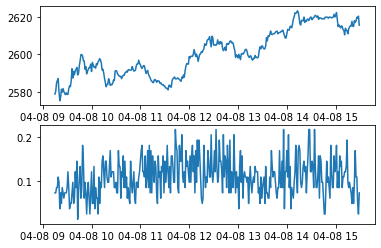

In [9]:
# Comparing ticker data against Buzz for 1 min data
tick_data = yf.download('RELIANCE.NS', start="2022-04-08", end="2022-04-09", interval = '1m')
x = tick_data.index[:-1]
y = tick_data['Close'][:-1]
plt.subplot(2,1,1)
plt.plot(x,y)
x = tick_data.index[:-1]
z = score[score.index < '2022-04-08 15:30:00+05:30']['Reliance Buzz']
plt.subplot(2,1,2)
plt.plot(x,z)

In [10]:
# Correlation over 1 min data
corr_check = pd.DataFrame()
corr_check['Volume'] = tick_data['Volume'][:-1]
corr_check['Buzz'] = score[score.index < '2022-04-08 15:30:00+05:30']['Reliance Buzz']

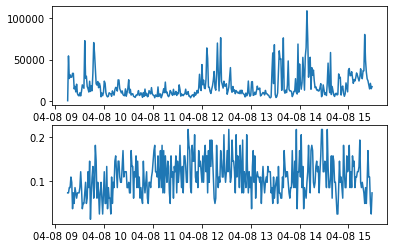

In [11]:
x = tick_data.index[:-1]
y = corr_check['Volume']
plt.subplot(2,1,1)
plt.plot(x,y)
x = tick_data.index[:-1]
z = corr_check['Buzz']
plt.subplot(2,1,2)
plt.plot(x,z)

In [12]:
corr_check.corr(method = 'pearson')

,Volume,Buzz
Volume,1.000000,-0.085203
Buzz,-0.085203,1.000000


In [92]:
day_data = yf.download('RELIANCE.NS', start="2022-04-02", end="2022-04-09", interval = '1d')
tweets = client.get_recent_tweets_count(query = 'Reliance', 
                                        granularity = 'day', 
                                        start_time = '2022-04-05T03:45:00Z', 
                                        end_time = '2022-04-09T10:00:00Z')
day_tweet = pd.DataFrame(tweets.data)
day_tweet.columns = ['End', 'Start', 'Tweet Count']
day_tweet['Start'] = pd.to_datetime(day_tweet['Start']).dt.tz_convert('Asia/Kolkata')
day_tweet['Start'] = day_tweet['Start'].dt.date
day_tweet['End'] = pd.to_datetime(day_tweet['End']).dt.tz_convert('Asia/Kolkata')
day_tweet.set_index('Start', inplace = True)

[*********************100%***********************]  1 of 1 completed


In [93]:
day_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-04,2655.449951,2675.000000,2641.649902,2663.699951,2663.699951,3659307
2022-04-05,2651.100098,2669.899902,2620.699951,2626.050049,2626.050049,6068663
2022-04-06,2587.100098,2634.500000,2587.100098,2619.050049,2619.050049,5656703
2022-04-07,2595.100098,2606.000000,2567.000000,2572.850098,2572.850098,7151632
2022-04-08,2560.000000,2625.000000,2560.000000,2615.649902,2615.649902,6992874


In [94]:
day_tweet

,End,Tweet Count
Start,,
2022-04-05,2022-04-06 05:30:00+05:30,4736
2022-04-06,2022-04-07 05:30:00+05:30,5740
2022-04-07,2022-04-08 05:30:00+05:30,6503
2022-04-08,2022-04-09 05:30:00+05:30,5455
2022-04-09,2022-04-09 15:30:00+05:30,1165


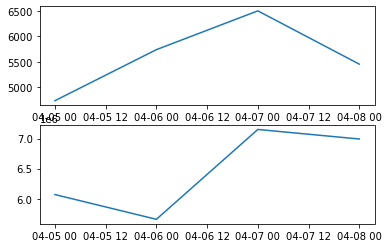

In [95]:
# 1 day graphs. Data limited since only 1 week recent data available for free API users.
x = day_tweet.index[:-1]
y = day_tweet['Tweet Count'][:-1]
plt.subplot(2,1,1)
plt.plot(x,y)
x = day_data.index[1:]
z = day_data['Volume'][1:]
plt.subplot(2,1,2)
plt.plot(x,z)

In [98]:
# Correlation over 1 day data
day_corr = pd.DataFrame()
day_corr['Count'] = day_tweet['Tweet Count'][:-1]
day_corr['Volume'] = day_data['Volume'][1:]
day_corr.corr(method = 'pearson')

,Count,Volume
Count,1.000000,0.488652
Volume,0.488652,1.000000
